In [4]:
from py_files.feature_engineering import *
from py_files.feature_selection import *
from py_files.modeling import *
from py_files.ploting import *
from py_files.apriori_clusters import *
from py_files.preprocessing import *
from py_files.initial_visualizations import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'feature_engineering'

In [3]:
cust_basket = pd.read_csv('data/customer_basket.csv')
cust_info = pd.read_csv('data/customer_info.csv')
prod_map = pd.read_excel('data/product_mapping.xlsx')

/Users/joelmendes/Documents/GitHub/ML2_Project/py_files/ploting.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


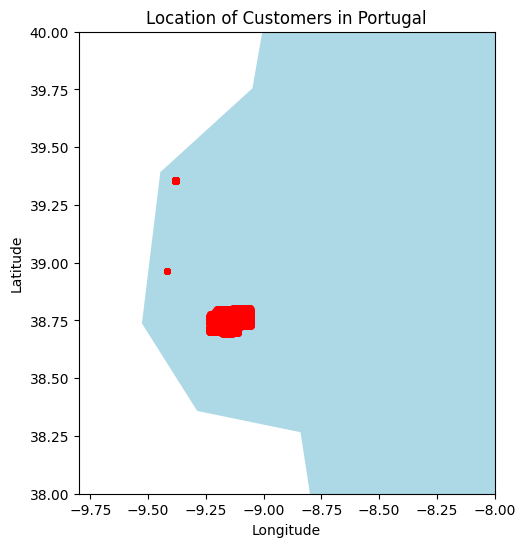

In [4]:
#para ver quais sao os pescadores, ver longitude
plot_population(cust_info)

In [ ]:
find_fishermen(cust_info)['longitude'].sort_values()

19547   -9.418076
25640   -9.418068
25567   -9.418067
31657   -9.418048
21033   -9.418037
           ...   
6087    -9.380334
41389   -9.380333
4944    -9.380328
26592   -9.380307
33280   -9.380286
Name: longitude, Length: 388, dtype: float64

For initial exploration of the clusters we need to first do some basic preprocessing: 
- alter the columns where nan values mean something
- remove nan values
- remove categorical variables
- scale data

In [ ]:
cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               43631 non-null  int64  
 1   customer_id                              43631 non-null  int64  
 2   customer_name                            43631 non-null  object 
 3   customer_gender                          43631 non-null  object 
 4   customer_birthdate                       43631 non-null  object 
 5   kids_home                                43107 non-null  float64
 6   teens_home                               42610 non-null  float64
 7   number_complaints                        42977 non-null  float64
 8   distinct_stores_visited                  42322 non-null  float64
 9   lifetime_spend_groceries                 43631 non-null  float64
 10  lifetime_spend_electronics               43631

#### Basic preprocessing explanation: 
- drop first column because it means nothing
- drop customer id, does not have business value
- drop customer name, categorical
- since bools vary the segmentation aggressively i will just remove gender as well
- i will not waste time converting birth date to age so will drop as well
- loyalty_card_number should be converted to a boolean but i will just remove it
- since latitude and longitude do not make sense to standardize and need to be analysed apart i will remove it 

In [ ]:
cust_info_pp = cust_info.drop(columns=['Unnamed: 0', 'customer_id', 'customer_name', 'customer_gender',
                                       'customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude'])

In [ ]:
cust_info_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kids_home                                43107 non-null  float64
 1   teens_home                               42610 non-null  float64
 2   number_complaints                        42977 non-null  float64
 3   distinct_stores_visited                  42322 non-null  float64
 4   lifetime_spend_groceries                 43631 non-null  float64
 5   lifetime_spend_electronics               43631 non-null  float64
 6   typical_hour                             41886 non-null  float64
 7   lifetime_spend_vegetables                42758 non-null  float64
 8   lifetime_spend_nonalcohol_drinks         43631 non-null  float64
 9   lifetime_spend_alcohol_drinks            43631 non-null  float64
 10  lifetime_spend_meat                      43631

In [ ]:
cust_info_pp.dropna(inplace=True)

In [ ]:
cust_info_pp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36673 entries, 0 to 43630
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kids_home                                36673 non-null  float64
 1   teens_home                               36673 non-null  float64
 2   number_complaints                        36673 non-null  float64
 3   distinct_stores_visited                  36673 non-null  float64
 4   lifetime_spend_groceries                 36673 non-null  float64
 5   lifetime_spend_electronics               36673 non-null  float64
 6   typical_hour                             36673 non-null  float64
 7   lifetime_spend_vegetables                36673 non-null  float64
 8   lifetime_spend_nonalcohol_drinks         36673 non-null  float64
 9   lifetime_spend_alcohol_drinks            36673 non-null  float64
 10  lifetime_spend_meat                      36673 non-

In [ ]:
# CREATE SAMPLE DATASET TO MAKE RUN TIMES FASTER
sample_pp = cust_info_pp.sample(frac=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()

cust_info_pp_sc = scaler.fit_transform(cust_info_pp)
sample_pp_sc = scaler.fit_transform(sample_pp)

## Kmeans Clustering

In [ ]:
# dispersion = create_dispersion_list(cust_info_pp_sc)

dispersion = create_dispersion_list(sample_pp_sc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

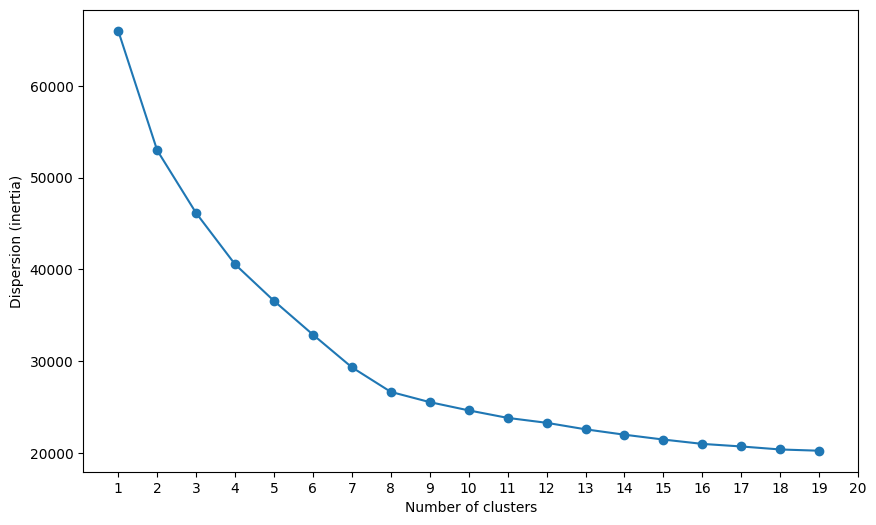

In [ ]:
plot_elbow_graph(dispersion)

In this case, observing the elbow graph, we see that the dispersion decreases rapidly initially and then starts to level off. The point where this leveling off occurs, often resembling an elbow, suggests the optimal number of clusters. In the given graph, 8 seems to be a reasonable number of clusters as it corresponds to the point where the decrease in dispersion significantly slows down, indicating diminishing returns in clustering quality beyond this point. Therefore, based on the elbow method, 8 clusters appear to be a suitable choice for this dataset.

In [ ]:
# allocate_clusters(cust_info_pp, cust_info_pp_sc, n_clusters=8, cluster_type='KMeans')
allocate_clusters_kmeans(sample_pp, sample_pp_sc, n_clusters=8)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
st = 'KMeans'
st.lower()

'kmeans'

In [ ]:
sample_pp

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,cluster_kmeans
32174,1.0,0.0,1.0,1.0,3932.0,332.0,9.0,149.0,812.0,1575.0,725.0,2079.0,1924.0,869.0,1560.0,1608.0,0.195728,2010.0,4
24009,2.0,1.0,1.0,2.0,4454.0,3148.0,18.0,462.0,551.0,445.0,1192.0,1187.0,678.0,1090.0,1056.0,82.0,0.151540,2007.0,3
38186,1.0,1.0,0.0,2.0,892.0,549.0,17.0,904.0,870.0,910.0,744.0,499.0,300.0,521.0,514.0,41.0,-0.100004,2007.0,0
27250,1.0,1.0,1.0,3.0,2003.0,272.0,15.0,233.0,264.0,175.0,601.0,339.0,358.0,526.0,928.0,339.0,0.594341,2016.0,2
30806,1.0,0.0,1.0,1.0,2738.0,689.0,11.0,1249.0,250.0,9.0,1.0,0.0,417.0,238.0,597.0,226.0,0.193813,2012.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41017,1.0,2.0,1.0,3.0,1964.0,315.0,16.0,228.0,342.0,358.0,584.0,248.0,374.0,493.0,573.0,623.0,0.496743,2012.0,2
30310,0.0,1.0,1.0,2.0,3995.0,4562.0,11.0,315.0,536.0,45.0,516.0,2346.0,2324.0,1312.0,2104.0,932.0,0.280473,2010.0,4
16939,2.0,3.0,1.0,1.0,5206.0,2997.0,9.0,549.0,493.0,212.0,1615.0,780.0,893.0,961.0,793.0,345.0,-0.088416,2005.0,3
9826,1.0,1.0,0.0,1.0,17428.0,1585.0,12.0,545.0,701.0,1321.0,2679.0,3663.0,2074.0,4721.0,3443.0,207.0,0.045707,2017.0,1


In [ ]:
# cust_info_pp.groupby(['cluster_kmeans']).mean()
sample_pp.groupby(['cluster_kmeans']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction
cluster_kmeans,,,,,,,,,,,,,,,,,,
0,1.000000,0.483728,0.542899,1.227811,2902.778107,429.124260,13.729290,984.642012,321.738166,171.295858,77.701183,79.313609,508.871302,239.480769,507.196746,220.460059,0.203176,2011.004438
1,1.001905,1.000000,0.499048,1.432381,13873.830476,8094.043810,13.580952,490.954286,598.548571,1038.327619,1990.000000,4008.569524,1991.780952,3975.758095,2981.209524,101.333333,0.042105,2011.205714
2,0.566176,0.994118,0.957353,2.966176,2052.307353,238.029412,12.433824,216.000000,315.710294,323.726471,424.804412,497.783824,486.260294,389.451471,605.072059,395.095588,0.481397,2010.805882
3,3.166038,2.037736,0.960377,1.118868,4989.722642,1933.062264,17.716981,500.271698,516.116981,312.667925,1036.050943,1006.001887,981.858491,1010.575472,996.549057,494.515094,0.198939,2010.973585
4,1.036697,0.832569,1.084862,1.979358,4857.722477,2026.337156,9.504587,316.525229,617.873853,976.981651,972.846330,1851.743119,1885.442661,946.864679,1863.022936,995.215596,0.197074,2008.465596
5,0.000000,0.016260,0.471545,1.000000,9956.149051,158.647696,11.907859,195.065041,503.642276,40.070461,195.883469,212.102981,75.452575,0.000000,9936.764228,50.848238,0.195482,2011.048780
6,0.000000,0.083333,0.583333,1.000000,13912.722222,184.138889,10.444444,356.694444,310.666667,96.222222,102.472222,40073.722222,91.527778,0.000000,0.000000,20.583333,0.388960,2011.250000
7,0.438554,0.204819,0.163855,1.561446,3252.481928,2085.137349,15.103614,261.440964,402.216867,843.539759,554.971084,685.884337,617.650602,698.901205,583.132530,375.269880,0.162595,2016.693976


In [ ]:
# cust_info_pp.mean()
sample_pp.mean()

kids_home                                     1.063267
teens_home                                    0.835833
number_complaints                             0.688574
distinct_stores_visited                       1.665667
lifetime_spend_groceries                   5707.277066
lifetime_spend_electronics                 2056.130079
typical_hour                                 13.481865
lifetime_spend_vegetables                   454.517589
lifetime_spend_nonalcohol_drinks            450.858740
lifetime_spend_alcohol_drinks               502.058631
lifetime_spend_meat                         726.941369
lifetime_spend_fish                        1538.781293
lifetime_spend_hygiene                      913.618489
lifetime_spend_videogames                  1023.308154
lifetime_spend_petfood                     2063.966185
lifetime_total_distinct_products            366.005999
percentage_of_products_bought_promotion       0.226827
year_first_transaction                     2011.340878
cluster_km

Note: It is **very** important to compare clusters against the mean of the variables and not their relative difference in between clusters. The mean (or any other centrality measure) of the variable will give us an "anchor" that we can use when explaining why a certain "cluster" has a certain set of characteristics.

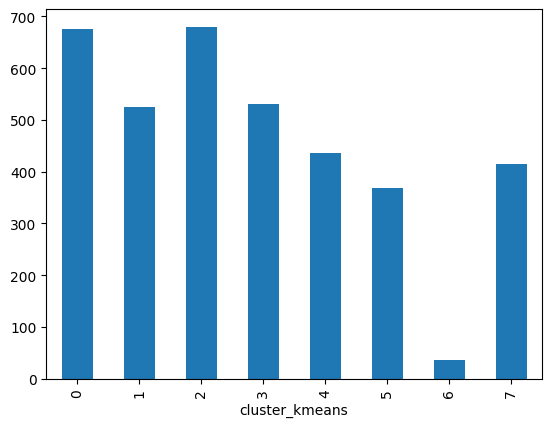

In [ ]:
# cust_info_pp.groupby(['cluster_kmeans']).size().plot(kind='bar')
sample_pp.groupby(['cluster_kmeans']).size().plot(kind='bar')
plt.show()

## Hierarchical Clustering

In [ ]:
# por isto em funcao 
# agg_clust = create_agg_clusters(cust_info_pp_sc)
agg_clust = create_agg_clusters(sample_pp_sc)

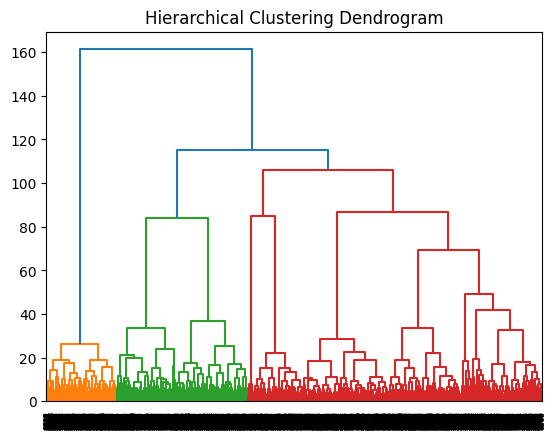

In [ ]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.show()

We can notice that outliers are still present in the dataset because some clusters have very few points.

On the right clusters should be further analysed in order to understand if they are similiar (if so join in one) or different (mantain separate)

I will cut around the y=200 making the solution 8 clusters to be able to compare it with the k-means.

In [ ]:
# allocate_clusters(cust_info_pp, cust_info_pp_sc, n_clusters=8, cluster_type='AgglomerativeClustering')
allocate_clusters_aggclust(sample_pp, sample_pp_sc, n_clusters=8)

In [ ]:
AgglomerativeClustering()

AgglomerativeClustering()

In [ ]:
# cust_info_pp.head()
sample_pp.head()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,cluster_kmeans,cluster_hierarchical
32174,1.0,0.0,1.0,1.0,3932.0,332.0,9.0,149.0,812.0,1575.0,725.0,2079.0,1924.0,869.0,1560.0,1608.0,0.195728,2010.0,4,2
24009,2.0,1.0,1.0,2.0,4454.0,3148.0,18.0,462.0,551.0,445.0,1192.0,1187.0,678.0,1090.0,1056.0,82.0,0.151540,2007.0,3,1
38186,1.0,1.0,0.0,2.0,892.0,549.0,17.0,904.0,870.0,910.0,744.0,499.0,300.0,521.0,514.0,41.0,-0.100004,2007.0,0,0
27250,1.0,1.0,1.0,3.0,2003.0,272.0,15.0,233.0,264.0,175.0,601.0,339.0,358.0,526.0,928.0,339.0,0.594341,2016.0,2,3
30806,1.0,0.0,1.0,1.0,2738.0,689.0,11.0,1249.0,250.0,9.0,1.0,0.0,417.0,238.0,597.0,226.0,0.193813,2012.0,0,4


In [ ]:
# cust_info_pp.groupby(['cluster_hierarchical']).mean()
sample_pp.groupby(['cluster_hierarchical']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,cluster_kmeans
cluster_hierarchical,,,,,,,,,,,,,,,,,,,
0,0.510851,0.480801,0.337229,1.782972,2728.519199,1486.824708,14.380634,315.799666,429.242070,712.545910,523.803005,607.272120,548.754591,597.818030,557.343907,375.165275,0.191901,2014.429048,5.148581
1,3.139665,1.983240,0.951583,1.098696,5073.864060,1981.644320,17.677840,496.728119,509.182495,302.350093,1040.962756,1020.100559,988.251397,1016.668529,1003.184358,502.452514,0.200029,2011.048417,3.078212
2,1.046296,0.835648,1.111111,1.962963,4944.481481,2062.432870,9.592593,309.995370,588.738426,1002.932870,972.039352,1876.958333,1910.650463,960.138889,1893.287037,992.261574,0.201740,2008.625000,4.002315
3,0.559041,0.987085,0.998155,3.149446,2053.488930,216.136531,12.378229,208.105166,308.990775,307.081181,409.470480,498.055351,487.448339,385.202952,602.964945,396.435424,0.525052,2010.976015,2.009225
4,1.000000,0.450479,0.533546,1.177316,2967.186901,419.099042,13.686901,992.530351,302.132588,141.642173,48.031949,39.731629,518.049521,219.798722,506.105431,209.774760,0.206555,2011.105431,0.059105
5,0.000000,0.083333,0.583333,1.000000,13912.722222,184.138889,10.444444,356.694444,310.666667,96.222222,102.472222,40073.722222,91.527778,0.000000,0.000000,20.583333,0.388960,2011.250000,6.000000
6,0.000000,0.016216,0.470270,1.000000,9941.762162,158.386486,11.902703,195.086486,503.748649,40.305405,196.156757,211.740541,75.586486,0.000000,9917.137838,50.859459,0.195328,2011.070270,5.005405
7,1.001905,1.000000,0.499048,1.432381,13873.830476,8094.043810,13.580952,490.954286,598.548571,1038.327619,1990.000000,4008.569524,1991.780952,3975.758095,2981.209524,101.333333,0.042105,2011.205714,1.000000


In [ ]:
# cust_info_pp.mean()
sample_pp.mean()

kids_home                                     1.063267
teens_home                                    0.835833
number_complaints                             0.688574
distinct_stores_visited                       1.665667
lifetime_spend_groceries                   5707.277066
lifetime_spend_electronics                 2056.130079
typical_hour                                 13.481865
lifetime_spend_vegetables                   454.517589
lifetime_spend_nonalcohol_drinks            450.858740
lifetime_spend_alcohol_drinks               502.058631
lifetime_spend_meat                         726.941369
lifetime_spend_fish                        1538.781293
lifetime_spend_hygiene                      913.618489
lifetime_spend_videogames                  1023.308154
lifetime_spend_petfood                     2063.966185
lifetime_total_distinct_products            366.005999
percentage_of_products_bought_promotion       0.226827
year_first_transaction                     2011.340878
cluster_km

In [ ]:
# Starting with the Ward vs. k-means:
'''pd.DataFrame(
    confusion_matrix(cust_info_pp.cluster_kmeans, cust_info_pp.cluster_hierarchical),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,8)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,8)],
)'''
pd.DataFrame(
    confusion_matrix(sample_pp.cluster_kmeans, sample_pp.cluster_hierarchical),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,8)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,8)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster,Ward 7 Cluster
K-means 0 Cluster,48,5,3,0,620,0,0,0
K-means 1 Cluster,0,0,0,0,0,0,0,525
K-means 2 Cluster,133,0,5,541,1,0,0,0
K-means 3 Cluster,12,514,4,0,0,0,0,0
K-means 4 Cluster,20,5,411,0,0,0,0,0
K-means 5 Cluster,0,0,0,0,0,0,369,0
K-means 6 Cluster,0,0,0,0,0,36,0,0
K-means 7 Cluster,386,13,9,1,5,0,1,0


We can see some similarities within clusters:
- Cluster 0 in kmeans is very simmilar to cluster 4 in hierarchical
- Cluster 1 in kmeans is simmilar to cluster 3 in hierarchical
- Cluster 2 in kmeans is simmilar to cluster 3 in hierarchical
- Cluster 3 in kmeans is very dispersed (divided into 1, 2 and 6)
- Cluster 4 in kmeans is divided into cluster 3 and 4 from hierachical
- Cluster 5 in kmeans is divided into cluster 0 and 7 from hierachical
- Cluster 6 in kmeans is very simmilar to cluster 4 in hierarchical
- Cluster 7 in kmeans only has values from cluster 5 in hierarchical but only 330 records

In [ ]:
cust_basket

,invoice_id,list_of_goods,customer_id
0,7448187,"['olive oil', 'yogurt cake', 'grated cheese', ...",43134
1,3167314,"['babies food', 'shower gel', 'rice', 'black b...",43134
2,10199712,"['babies food', 'barbecue sauce', 'olive oil',...",43134
3,12179179,"['babies food', 'milk', 'rice', 'yogurt cake',...",43134
4,8292388,"['napkins', 'cookies', 'razor', 'cooking oil',...",43134
...,...,...,...
89947,10920856,"['rice', 'pet food', 'cauliflower', 'cake', 'c...",31335
89948,10239983,"['cotton buds', 'cream', 'gums', 'cooking oil'...",35452
89949,10238942,"['cottage cheese', 'champagne', 'spaghetti', '...",3608
89950,6593522,"['chutney', 'samsung galaxy 10', 'catfish', 't...",33063


In [ ]:
cust_info

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,0,39634,David Frink,male,05/15/1964 10:34 PM,1.0,1.0,1.0,2.0,18306.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071
1,1,43460,Belinda Terry,female,03/26/1988 11:06 PM,1.0,0.0,1.0,2.0,5015.0,...,1925.0,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802
2,2,23937,Evelyn Calico,female,04/13/1969 06:07 PM,0.0,1.0,1.0,3.0,3097.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105
3,3,2431,Ora Boggess,female,06/15/1941 03:26 AM,0.0,0.0,0.0,1.0,10825.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318
4,4,10090,Lonnie Hopson,male,12/18/2001 03:03 AM,0.0,0.0,0.0,1.0,697.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,43626,48487,Amelia Crawford,female,08/28/1983 11:43 AM,1.0,1.0,0.0,1.0,7189.0,...,3779.0,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146
43627,43627,24856,Silvia Ramos,female,09/21/1992 07:16 PM,1.0,1.0,1.0,1.0,11238.0,...,3893.0,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643
43628,43628,21373,Addie Coronel,female,02/20/1994 05:58 AM,0.0,0.0,0.0,1.0,6059.0,...,142.0,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550
43629,43629,19527,Msc. Mary Ross,female,08/06/1989 04:39 PM,1.0,0.0,1.0,1.0,3098.0,...,0.0,393.0,210.0,422.0,178.0,0.182188,2007.0,933102.0,38.760889,-9.174663


In [ ]:
prod_map

,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
160,final fantasy XX,videogames
161,final fantasy XIX,videogames
162,final fantasy XXII,videogames
163,dog food,pet food


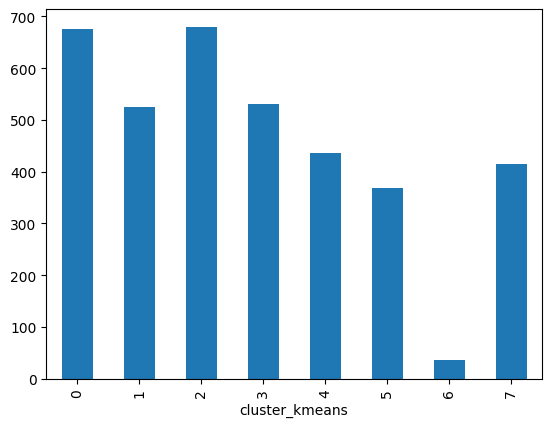

In [ ]:
sample_pp.groupby(['cluster_kmeans']).size().plot(kind='bar')
plt.show()

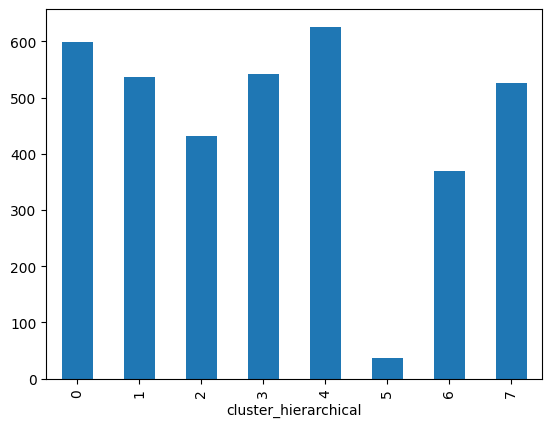

In [ ]:
sample_pp.groupby(['cluster_hierarchical']).size().plot(kind='bar')
plt.show()

In [ ]:
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(2, 11)

# ITERATE CLUSTERS TO DEFINE THE BEST PARAMS

for min_samples_test in min_samples_values:
    for eps_test in eps_values:
        '''model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit_predict(data_preprocessed)'''
        pass

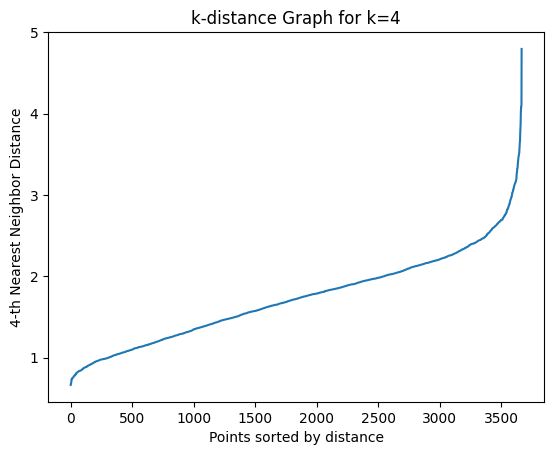

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(X, k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'k-distance Graph for k={k}')
    plt.show()

# Plot the k-distance graph
plot_k_distance(sample_pp_sc, k=4)

In [ ]:
from scipy.spatial import distance_matrix

# Calculate the distance matrix
dist_matrix = distance_matrix(sample_pp_sc, sample_pp_sc)

# Summary statistics of pairwise distances
print('Min distance:', np.min(dist_matrix))
print('Max distance:', np.max(dist_matrix))
print('Mean distance:', np.mean(dist_matrix))
print('Median distance:', np.median(dist_matrix))

Min distance: 0.0
Max distance: 17.37207960341201
Mean distance: 5.74037033024711
Median distance: 5.670100225062141


In [ ]:
sample_pp_sc.shape

(3667, 18)

In [ ]:
3667 * 0.15

550.05

In [ ]:
eps_range = np.arange(1, 2.5, 0.1)
min_samples_range = range(5, 13)

# Function to calculate and print cluster sizes and noise points
def print_cluster_info(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    cluster_info = dict(zip(unique_labels, counts))
    
    noise_points = cluster_info.get(-1, 0)
    clusters = {k: v for k, v in cluster_info.items() if k != -1}
    
    return clusters, noise_points

# Grid search over the parameter ranges
for min_samples in min_samples_range:
    for eps_val in eps_range:
        model = DBSCAN(eps=eps_val, min_samples=min_samples)
        labels = model.fit_predict(sample_pp_sc)
        
        clusters, noise_points = print_cluster_info(labels)
        
        if noise_points <= 500:
            print(f'eps: {round(eps_val,2)}, min_samples: {min_samples}')
            print(f'Cluster sizes: {clusters}')
            print(f'Number of noise points: {noise_points}')
            print('-' * 40)

eps: 2.2, min_samples: 5
Cluster sizes: {0: 2753, 1: 454, 2: 21, 3: 7}
Number of noise points: 432
----------------------------------------
eps: 2.3, min_samples: 5
Cluster sizes: {0: 2839, 1: 480, 2: 30}
Number of noise points: 318
----------------------------------------
eps: 2.4, min_samples: 5
Cluster sizes: {0: 2925, 1: 496, 2: 31}
Number of noise points: 215
----------------------------------------
eps: 2.2, min_samples: 6
Cluster sizes: {0: 2737, 1: 448, 2: 20}
Number of noise points: 462
----------------------------------------
eps: 2.3, min_samples: 6
Cluster sizes: {0: 2826, 1: 476, 2: 22, 3: 5}
Number of noise points: 338
----------------------------------------
eps: 2.4, min_samples: 6
Cluster sizes: {0: 2914, 1: 494, 2: 29}
Number of noise points: 230
----------------------------------------
eps: 2.2, min_samples: 7
Cluster sizes: {0: 2721, 1: 442, 2: 20, 3: 4}
Number of noise points: 480
----------------------------------------
eps: 2.3, min_samples: 7
Cluster sizes: {0: 

In [ ]:
allocate_clusters_dbscan(sample_pp, sample_pp_sc, eps=2.5, min_samples=8)

sample_pp.groupby(['cluster_dbscan']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,cluster_kmeans,cluster_hierarchical
cluster_dbscan,,,,,,,,,,,,,,,,,,,,
-1,1.236559,0.962366,0.833333,2.037634,4941.854839,2146.817204,13.075269,511.908602,679.602151,924.666667,911.037634,2669.139785,1104.177419,1114.446237,1187.715054,638.408602,0.158872,2012.768817,3.430108,2.059140
0,1.073848,0.807588,0.711721,1.698171,4290.093157,1058.671748,13.529810,446.216463,413.514566,388.566734,508.052846,661.735772,727.970867,528.115176,1985.141599,397.160230,0.260391,2011.302846,3.004065,2.567751
1,1.000000,1.000000,0.501002,1.374749,13885.981964,8034.965932,13.575150,491.533066,595.575150,1040.058116,1991.112224,4012.180361,1989.967936,3980.336673,2980.983968,101.018036,0.043257,2011.060120,1.000000,7.000000
2,0.000000,0.100000,0.633333,1.000000,13864.666667,195.800000,9.733333,299.833333,300.200000,100.766667,96.800000,39690.966667,96.600000,0.000000,0.000000,19.166667,0.398868,2010.900000,6.000000,5.000000


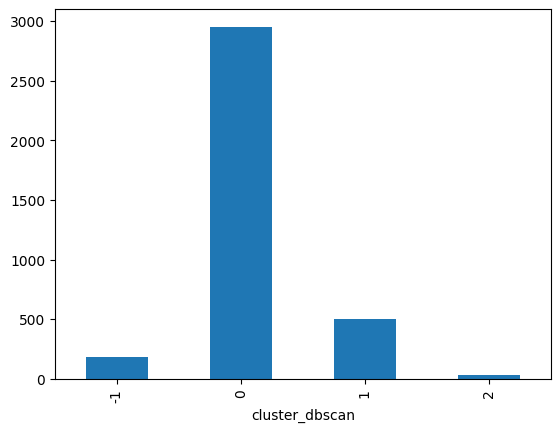

In [ ]:
sample_pp.groupby(['cluster_dbscan']).size().plot(kind='bar')
plt.show()

In [ ]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(sample_pp_sc, quantile=0.15)

In [ ]:
allocate_clusters_meanshift(sample_pp, sample_pp_sc, bandwidth=4)

In [ ]:
sample_pp.groupby(['cluster_meanshift']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,cluster_kmeans,cluster_hierarchical,cluster_dbscan
cluster_meanshift,,,,,,,,,,,,,,,,,,,,,
0,1.232189,0.923588,0.740495,1.805463,3442.671835,1166.573643,13.735327,485.748985,415.953858,455.816537,...,729.288298,820.172388,606.437062,847.533038,461.510520,0.264720,2011.435216,2.765965,2.023256,-0.050941
1,1.005576,1.000000,0.507435,1.453532,13684.988848,7981.836431,13.485130,486.819703,603.055762,1045.784387,...,3960.280669,2001.189591,3904.314126,2957.689591,115.159851,0.044620,2011.122677,1.072491,6.879182,0.873606
2,0.000000,0.016260,0.471545,1.000000,9956.149051,158.647696,11.907859,195.065041,503.642276,40.070461,...,212.102981,75.452575,0.000000,9936.764228,50.848238,0.195482,2011.048780,5.000000,6.000000,0.000000
3,0.000000,0.083333,0.583333,1.000000,13912.722222,184.138889,10.444444,356.694444,310.666667,96.222222,...,40073.722222,91.527778,0.000000,0.000000,20.583333,0.388960,2011.250000,6.000000,5.000000,1.500000
4,1.333333,1.066667,3.400000,2.000000,4345.733333,1345.533333,13.600000,272.866667,333.866667,1690.666667,...,1034.533333,1374.333333,607.466667,979.600000,696.800000,0.300583,2009.533333,3.600000,2.000000,-0.866667


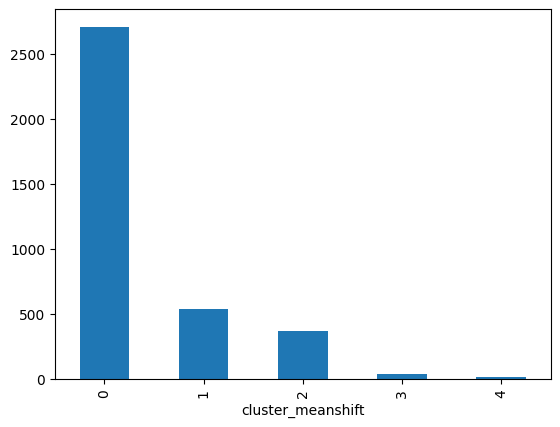

In [ ]:
sample_pp.groupby(['cluster_meanshift']).size().plot(kind='bar')
plt.show()